In [1]:
# For N-dimensional array manipulation
import numpy as np
# Plotting library
import matplotlib.pyplot as plt
# For data analysis and data structures in DataFrames
import pandas as pd
# For data visualization
import seaborn as sns

# For machine learning algorithms and evaluation metrics
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:

# Load dataset
df = pd.read_csv('media_bias.csv')

# Print head to see whether load was successful
print(df.head)

# Remove rows where 'Label_bias' is 'No agreement'
df = df[df.Label_bias != 'No agreement']

# separate the data into dependent and independent variables (only using sentence column)
X = df['sentence']
y = df['Label_bias']


<bound method NDFrame.head of       Unnamed: 0                                           sentence  \
0              0  YouTube is making clear there will be no “birt...   
1              1  The increasingly bitter dispute between Americ...   
2              2  So while there may be a humanitarian crisis dr...   
3              3  A professor who teaches climate change classes...   
4              4  Looking around the United States, there is nev...   
...          ...                                                ...   
1695        1695  In every case legislators are being swarmed by...   
1696        1696  Polls show the transgender ideology is deeply ...   
1697        1697  Democrats and Republicans stood and applauded ...   
1698        1698  As a self-described Democratic socialist, Sen....   
1699        1699  During the segment, Colbert also bemoaned the ...   

                                              news_link      outlet  \
0     https://eu.usatoday.com/story/tech/2020/

In [3]:
# Replace label with 0, 1
y = y.replace('Biased', 0)
y = y.replace('Non-biased', 1)

# Remove numbers from all strings in X
X = X.str.replace('\d+', '', regex=True)

# Remove punctuation from all strings in X
X = X.str.replace('[^\w\s]','',regex=True)

In [4]:
# Print feature names from countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
feature_vector = cv.fit(X) # Fit the Data

# Get the feature names
word = feature_vector.get_feature_names_out()
print( "Total number of features: ", len(word))

train_features = cv.transform(X)
type(train_features)

print(train_features.shape)

Total number of features:  8729
(1551, 8729)


In [5]:
# Create dataframe from train_features
df_train_features = pd.DataFrame(train_features.toarray(), columns=word)

# Count the amount of times each word appears
word_count = df_train_features.sum(axis=0)

# Create dataframe from word_count
df_word_count = pd.DataFrame(dict(features = word,counts = word_count))
df_word_count.sort_values('counts', ascending = False)[0:15]
print(df_word_count.head(15))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train_features, y, test_size=0.2, random_state=42)


              features  counts
aaron            aaron       1
abandon        abandon       1
abandoned    abandoned       2
abbott          abbott       2
abe                abe       1
abetting      abetting       1
abhor            abhor       1
abhors          abhors       1
abilities    abilities       1
ability        ability       6
abjectness  abjectness       1
able              able       5
ablution      ablution       1
aborted        aborted       1
aborting      aborting       1


In [6]:
# Fit the model to the data
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.73      0.96      0.83       208
           1       0.78      0.27      0.40       103

    accuracy                           0.73       311
   macro avg       0.75      0.62      0.62       311
weighted avg       0.74      0.73      0.69       311

Accuracy: 0.7331189710610932


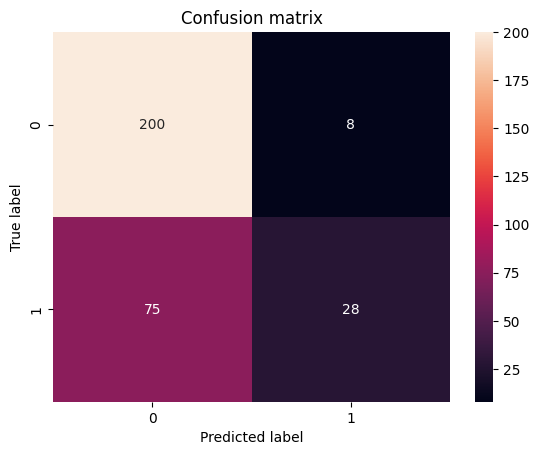

In [7]:
# Print classification report
print(metrics.classification_report(y_test, y_pred))

# Print the accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Print the confusion matrix and heatmap
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
